## Pytorch for Binary Classification

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
data = load_breast_cancer()
x = data['data']
y = data['target']

print(x.shape, y.shape)
print(x[:5])
print(y[:5])

(569, 30) (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-0

In [3]:
## feature scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [4]:
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length

trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [5]:
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    
    return x

In [6]:
learning_rate = 0.002
epochs = 200

# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
#optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [7]:
loss_list = []
acc_list = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    if i%20 == 0:
        loss1 = loss.detach().cpu().numpy()
        loss_list.append(loss1)
        acc_list.append(acc)
        print("epoch {}\tloss : {}\t acc : {}".format(i,loss1,acc))

epoch 0	loss : 0.7669116854667664	 acc : 0.6274165202108963
epoch 0	loss : 0.6871923804283142	 acc : 0.6274165202108963
epoch 0	loss : 0.6743159294128418	 acc : 0.6414762741652021
epoch 0	loss : 0.6764151453971863	 acc : 0.6625659050966608
epoch 0	loss : 0.6434087753295898	 acc : 0.6959578207381371
epoch 0	loss : 0.6297008395195007	 acc : 0.7627416520210897
epoch 0	loss : 0.6171368360519409	 acc : 0.8084358523725835
epoch 0	loss : 0.6053314805030823	 acc : 0.836555360281195
epoch 0	loss : 0.5902268886566162	 acc : 0.8646748681898067
epoch 20	loss : 0.03153533115983009	 acc : 0.9912126537785588
epoch 20	loss : 0.04487341642379761	 acc : 0.9912126537785588
epoch 20	loss : 0.04862436279654503	 acc : 0.9912126537785588
epoch 20	loss : 0.023798879235982895	 acc : 0.9912126537785588
epoch 20	loss : 0.0888151004910469	 acc : 0.9912126537785588
epoch 20	loss : 0.010956209152936935	 acc : 0.9912126537785588
epoch 20	loss : 0.017213469371199608	 acc : 0.9912126537785588
epoch 20	loss : 0.0197984

Text(0.5, 0, 'epochs')

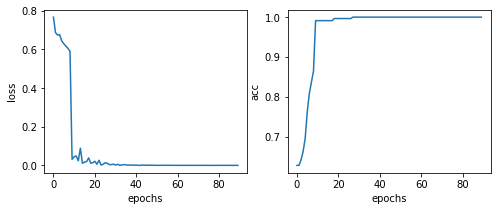

In [8]:
nx,ny = 2,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*4,ny*3))
    
ax[0].plot(loss_list)
ax[1].plot(acc_list)
ax[0].set_ylabel("loss")
ax[1].set_ylabel("acc")
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")